          name symbol       priceUsd  marketCapUsd  changePercent24Hr
0      Bitcoin    BTC  116681.421535  2.321634e+12          -1.666801
1     Ethereum    ETH    3733.741385  4.507038e+11           2.245894
2          XRP    XRP       3.146153  1.863770e+11          -0.589447
3  Tether USDt   USDT       1.000374  1.631096e+11          -0.023757
4          BNB    BNB     771.908638  1.075181e+11           0.248698
5       Solana    SOL     181.919489  9.793052e+10          -2.424520
6         USDC   USDC       0.999996  6.447169e+10          -0.001369
7     Dogecoin   DOGE       0.232682  3.495844e+10          -2.681221
8         TRON    TRX       0.312756  2.962757e+10           1.047117
9      Cardano    ADA       0.814252  2.883142e+10           0.352399


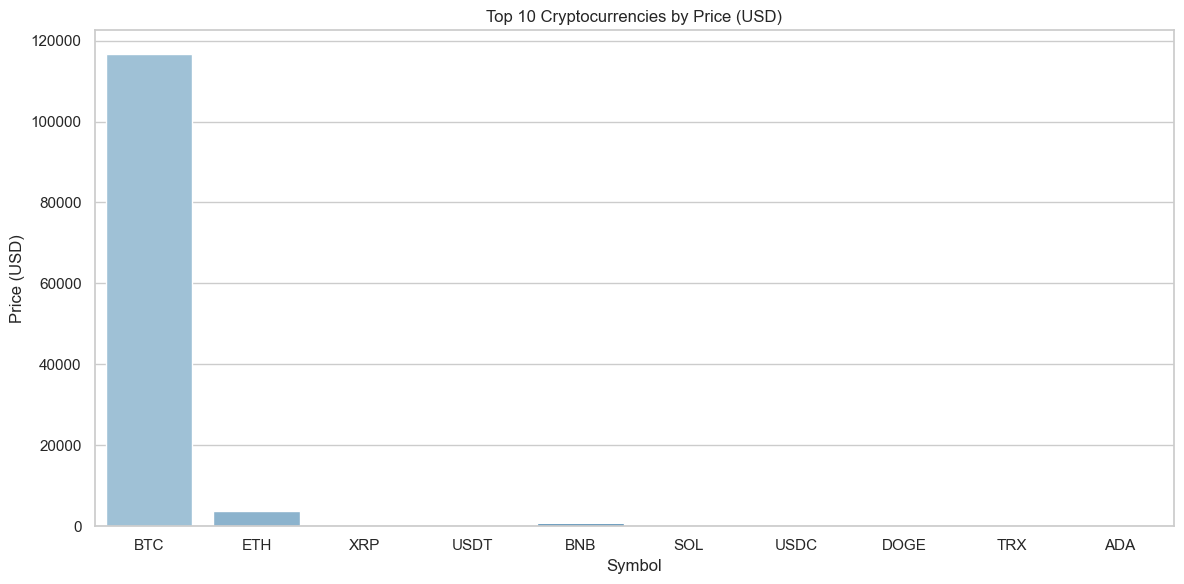

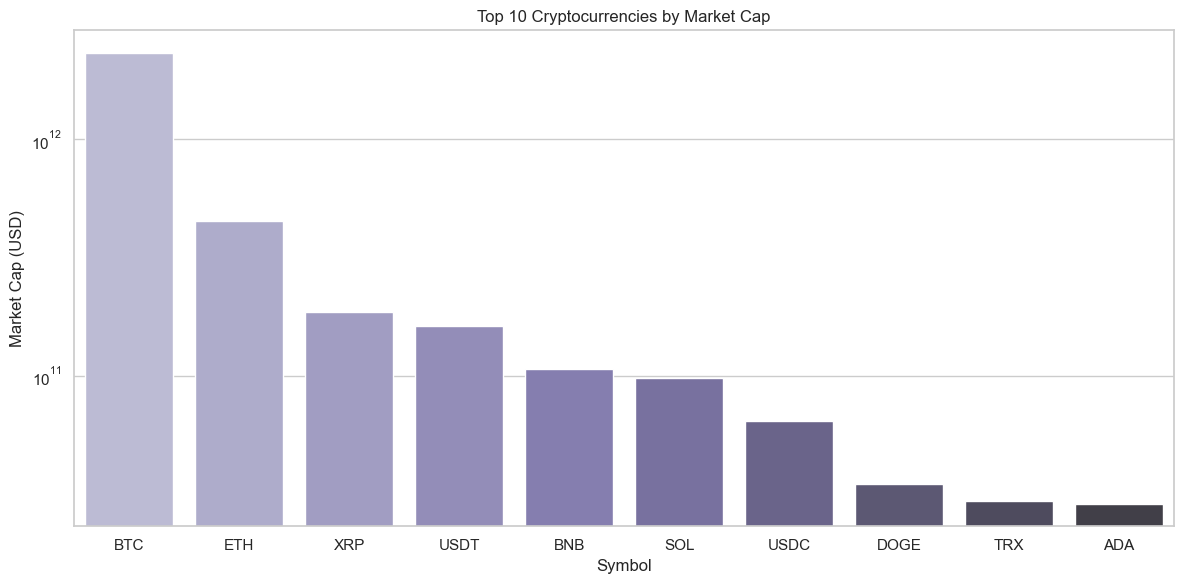

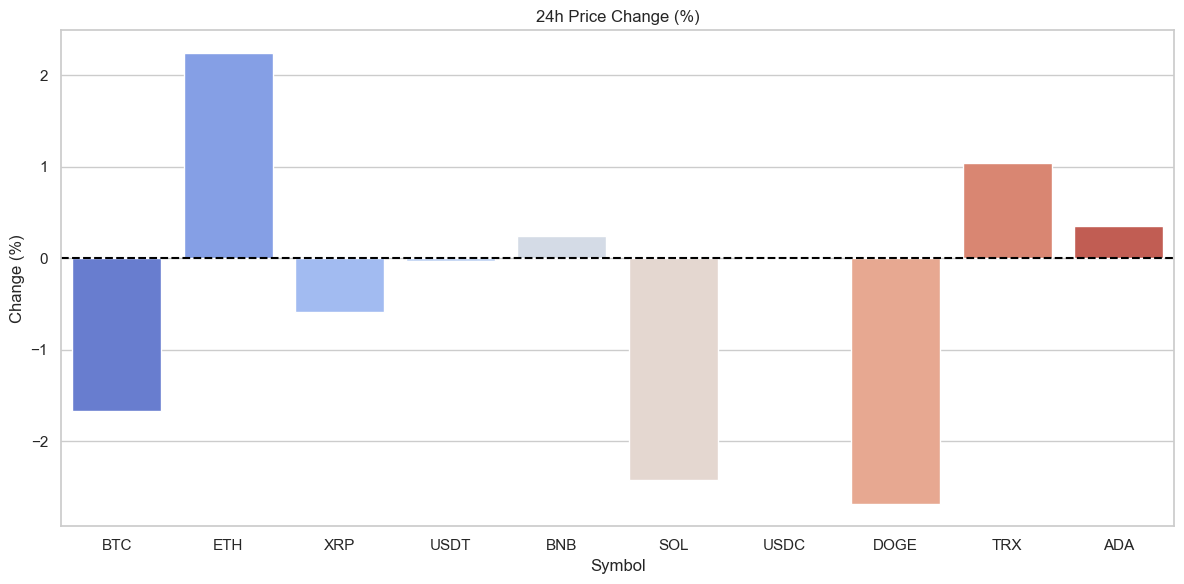

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔑 Replace with your actual CoinMarketCap API key
api_key = "f3e37ba9-a01d-400f-81e7-80d6d40ab4a4"

# 📡 CoinMarketCap API endpoint
api_url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

# 🧾 Request headers with API key
headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": api_key,
}

# 📥 Fetch data
response = requests.get(api_url, headers=headers)
data = response.json()

# 🧹 Process data
coins = data["data"]
df = pd.DataFrame([{
    "name": coin["name"],
    "symbol": coin["symbol"],
    "priceUsd": coin["quote"]["USD"]["price"],
    "marketCapUsd": coin["quote"]["USD"]["market_cap"],
    "changePercent24Hr": coin["quote"]["USD"]["percent_change_24h"]
} for coin in coins])

# 📋 Print a preview
print(df.head(10))

# 🎨 Plot settings
sns.set(style="whitegrid")

# 📊 Price Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(10), x='symbol', y='priceUsd', hue='symbol', palette='Blues_d', legend=False)
plt.title("Top 10 Cryptocurrencies by Price (USD)")
plt.xlabel("Symbol")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

# 📊 Market Cap Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(10), x='symbol', y='marketCapUsd', hue='symbol', palette='Purples_d', legend=False)
plt.title("Top 10 Cryptocurrencies by Market Cap")
plt.xlabel("Symbol")
plt.ylabel("Market Cap (USD)")
plt.yscale('log')
plt.tight_layout()
plt.show()

# 📉 24h Change Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(10), x='symbol', y='changePercent24Hr', hue='symbol', palette='coolwarm', legend=False)
plt.axhline(0, color='black', linestyle='--')
plt.title("24h Price Change (%)")
plt.xlabel("Symbol")
plt.ylabel("Change (%)")
plt.tight_layout()
plt.show()
